In [1]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from utils import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [70]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100
net = Net()
load_path = {50: r".\trained_models\2018_09_08\01_44\epoch76", 100: r"C:\Users\Mattan\Downloads\epoch_200_no_tf"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

[11_39] Loaded E, G from C:\Users\Mattan\Downloads\epoch_200_no_tf


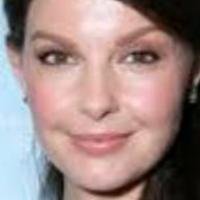

In [290]:
# Game 3: Kids
# Set the attributes of the first random person you want to test
age_1 = 30
gender_1 = FEMALE
race_1 = WHITE

image_path_1 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_1, g=gender_1, r=race_1))))
Image(filename=image_path_1)  # Will select and show a person with the attributes you selected

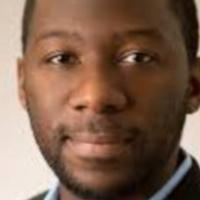

In [286]:
# Game 3: Kids
# Set the attributes of the second random person you want to test
age_2 = 35
gender_2 = MALE
race_2 = BLACK

image_path_2 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_2, g=gender_2, r=race_2))))
Image(filename=image_path_2)  # Will select and show a person with the attributes you selected

[11_51] Saved test result to C:\Users\Mattan\AppData\Local\Temp\kids.png


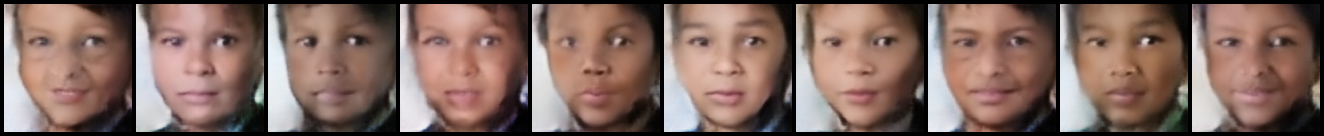

In [291]:
image_tensor_1 = pil_to_model_tensor_transform(pil_loader(image_path_1))
image_tensor_2 = pil_to_model_tensor_transform(pil_loader(image_path_2))
Image(filename=net.kids(image_tensors=(image_tensor_1, image_tensor_2), length=10, target=tempdir))